In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(".\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
from catboost import CatBoostClassifier

In [10]:
catb_model = CatBoostClassifier(verbose = False).fit(X_train, y_train)

In [11]:
catb_params = { "iterations": [200, 500, 1000], "learning_rate": [0.01, 0.1, 0.3], "depth": [4,5,8] } 

In [12]:
catb_cv_model = GridSearchCV(catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.2min finished


In [13]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [48]:
catb_tuned = CatBoostClassifier(iterations = 200, depth = 5, learning_rate = 0.01, verbose = False).fit(X_train, y_train)

In [49]:
y_pred = catb_tuned.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.7619047619047619

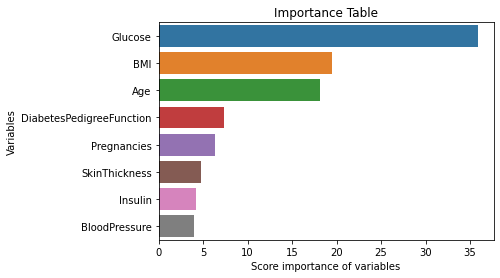

In [51]:
feature_imp = pd.Series(catb_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
import seaborn as sns

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Score importance of variables")
plt.ylabel("Variables")
plt.title("Importance Table")
plt.show()